In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.vis_utils import plot_model

import os

In [2]:
# !pip install nltk
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nps_chat is already up-to-date!
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swa

[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet is already up-to-date!
[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet3 is already up-to-date!
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package webtext is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloadin

True

In [3]:
file="Reviews.csv"
import pandas as pd
df= pd.read_csv(file)
print(df.shape)

(334119, 31)


C:\Users\hkmeh\AppData\Local\Temp\ipykernel_29308\3228912811.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(file)


In [4]:
df.head()

,Unnamed: 0,ï»¿,uuid,createdAt,updatedAt,text,isAnonymous,reviewerName,reviewerId,ratings_overall,...,longitude,primary_cuisine,primary_cuisine_id,cuisines,review_number,restaurant_overall_rating,hero_image,hero_listing_image,vertical_type_ids,web_path
0,0,0,68e8f769-a0f0-460c-bfb9-16662fcc1e17,2023-11-02T06:48:08Z,2023-11-02T06:48:08Z,too much small amount,False,MOON,bdaclwhn,2,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
1,1,1,706a1e43-7475-4d7f-8488-cb8ed2ea8991,2023-10-27T07:35:53Z,2023-10-27T07:35:53Z,very small in amount,False,MOON,bdaclwhn,2,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
2,2,2,16cd99a3-7295-432e-b193-1551df62d255,2023-10-25T18:09:17Z,2023-10-25T18:09:17Z,food average but their desert booter halwa and...,False,SALMAN,bdjrt0zq,3,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
3,3,3,61a9fdf3-ad6b-4d23-9436-1f2f596bbcff,2023-10-25T07:48:39Z,2023-10-25T07:48:39Z,fresh and tasty,False,GOLAM,b6hrp8of,5,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
4,4,4,a7835cdf-2c1f-4cf0-b9d5-2777d904d746,2023-10-15T13:37:20Z,2023-10-15T13:37:20Z,everything i ordered was good,False,FERZANA,bddrkjrd,4,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...


In [5]:
df.loc[1:10, ['text','reviewerName', 'ratings_overall','labels']]

,text,reviewerName,ratings_overall,labels
1,very small in amount,MOON,2,1
2,food average but their desert booter halwa and...,SALMAN,3,2
3,fresh and tasty,GOLAM,5,3
4,everything i ordered was good,FERZANA,4,3
5,kalo jira vhorta balu vhorta not recommended b...,FERZANA,1,1
6,quantity of dal should be little more otherwis...,FERZANA,4,3
7,beef was too poor in size quantity aganist pri...,DEDAR,3,2
8,chicken was not up to the mark and lotpoti was...,IFTEKHER,5,3
9,lot of sand in kali jeers bortha,MOHAMMAD,4,3
10,bad,MOHAMMAD,1,1


In [6]:
df['ratings_overall'].value_counts()

ratings_overall
1    127409
5     94199
4     39330
3     39315
2     33866
Name: count, dtype: int64

In [7]:
df['ratings_overall'].unique()

array([2, 3, 5, 4, 1], dtype=int64)

In [8]:
df.iloc[0:16]['text']

0                                 too much small amount
1                                  very small in amount
2     food average but their desert booter halwa and...
3                                       fresh and tasty
4                         everything i ordered was good
5     kalo jira vhorta balu vhorta not recommended b...
6     quantity of dal should be little more otherwis...
7     beef was too poor in size quantity aganist pri...
8     chicken was not up to the mark and lotpoti was...
9                      lot of sand in kali jeers bortha
10                                                  bad
11    very good food i chose this home kitchen rando...
12    honestly eating today s beef ribs and dal felt...
13    i ate good food after a long time the food was...
14           really good clean tasting will order again
15                           too spicy with dry chilli 
Name: text, dtype: object

In [9]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

# Text preprocessing

In [10]:
def clean_text(text):
    text = text.lower()
    
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"don t", "do not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"didn t", "did not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"won t", "will not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"isn t", "is not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"aren t", "are not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"wasn t", "was not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"weren t", "were not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"haven t", "have not", text)
    text = re.sub(r"hadn't", "had not", text)
    text = re.sub(r"hadn t", "had not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"couldn t", "could not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"shouldn t", "should not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"can t", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"it s", "it is", text)
    text = re.sub(r"kebab", "kabab", text)
    text = re.sub(r"nun", "naan", text)
    text = re.sub(r"nan", "naan", text)
    text = re.sub('[^a-zA-Z]'," ",text)
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text= re.sub('\s{2,}', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
#     print(text)
    text = "".join(text)
    return text

In [11]:
df['text']=df['text'].apply(clean_text)

In [12]:
df.iloc[0:16]['text']

0                                 too much small amount
1                                  very small in amount
2     food average but their desert booter halwa and...
3                                       fresh and tasty
4                         everything i ordered was good
5     kalo jira vhorta balu vhorta not recommended b...
6     quantity of dal should be little more otherwis...
7     beef was too poor in size quantity aganist pri...
8     chicken was not up to the mark and lotpoti was...
9                      lot of sand in kali jeers bortha
10                                                  bad
11    very good food i chose this home kitchen rando...
12    honestly eating today s beef ribs and dal felt...
13    i ate good food after a long time the food was...
14           really good clean tasting will order again
15                           too spicy with dry chilli 
Name: text, dtype: object

In [13]:
df.iloc[111]['text']

'the food was cold'

In [14]:
df.iloc[0]

Unnamed: 0                                                                   0
ï»¿                                                                          0
uuid                                      68e8f769-a0f0-460c-bfb9-16662fcc1e17
createdAt                                                 2023-11-02T06:48:08Z
updatedAt                                                 2023-11-02T06:48:08Z
text                                                     too much small amount
isAnonymous                                                              False
reviewerName                                                              MOON
reviewerId                                                            bdaclwhn
ratings_overall                                                              2
labels                                                                       1
ratings                      [{'topic': 'overall', 'score': 2}, {'topic': '...
type                                                

In [15]:
def get_summary(df):   

    content = df["text"].values        
    word_tok = [word.lower() for item in content for word in nltk.word_tokenize(item)]    
    st_words = set(word_tok)   
    
    fact = {
        "TotalCount": len(content),
        "TotalWords": len(word_tok),        
        "TotalUniqueWords": len(st_words),
        "MeanWordsPerTweet": len(word_tok) / len(content),
    }

    return fact, df.describe()

In [16]:
f, s = get_summary(df)
s

,Unnamed: 0,ï»¿,ratings_overall,labels,likeCount,latitude,longitude,primary_cuisine_id,review_number,restaurant_overall_rating
count,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000
mean,167059.000000,168411.559947,2.817562,1.916958,0.241884,23.668077,90.623229,127.527136,4014.909981,3.841418
std,96451.991633,96817.799309,1.684886,0.935649,0.629411,0.528833,0.528335,54.243513,5812.797803,0.445709
min,0.000000,0.000000,1.000000,1.000000,-2.000000,22.269991,90.210323,0.000000,0.000000,0.000000
25%,83529.500000,84763.500000,1.000000,1.000000,0.000000,23.741879,90.371986,85.000000,488.000000,3.600000
50%,167059.000000,168499.000000,3.000000,2.000000,0.000000,23.773776,90.405709,86.000000,1584.000000,3.900000
75%,250588.500000,252235.500000,5.000000,3.000000,0.000000,23.810406,90.425728,193.000000,4697.000000,4.100000
max,334118.000000,335947.000000,5.000000,3.000000,51.000000,24.919806,91.910593,249.000000,32993.000000,5.000000


In [17]:
f

{'TotalCount': 334119,
 'TotalWords': 3670563,
 'TotalUniqueWords': 47276,
 'MeanWordsPerTweet': 10.985795480053515}

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
doc=np.array(df['text'])

In [19]:
bag=vect.fit_transform(doc)

In [20]:
print(vect.vocabulary_)

{'too': 43554, 'much': 28883, 'small': 39646, 'amount': 1562, 'very': 45311, 'in': 19783, 'food': 15785, 'average': 2696, 'but': 6495, 'their': 42683, 'desert': 11299, 'booter': 5644, 'halwa': 18133, 'and': 1635, 'pudding': 34944, 'is': 20228, 'good': 17323, 'fresh': 16137, 'tasty': 42025, 'everything': 14417, 'ordered': 31374, 'was': 45952, 'kalo': 22188, 'jira': 21398, 'vhorta': 45428, 'balu': 3284, 'not': 30257, 'recommended': 35973, 'baki': 3196, 'shob': 38777, 'valo': 44983, 'chilo': 8037, 'quantity': 35292, 'of': 30688, 'dal': 10333, 'should': 39022, 'be': 3885, 'little': 25940, 'more': 28562, 'otherwise': 31635, 'specially': 40349, 'beef': 4006, 'poor': 33994, 'size': 39473, 'aganist': 563, 'price': 34592, 'test': 42402, 'chicken': 7852, 'up': 44612, 'to': 43349, 'the': 42644, 'mark': 27005, 'lotpoti': 26190, 'full': 16402, 'potato': 34309, 'alu': 1307, 'bhorta': 4680, 'did': 11868, 'seem': 38014, 'lot': 26176, 'sand': 37485, 'kali': 22161, 'jeers': 21091, 'bortha': 5745, 'bad':

In [21]:
print(len(vect.vocabulary_))

47253


In [22]:
r=np.array(df['text'].values).reshape(-1,1)

In [23]:
r.shape

(334119, 1)

In [24]:
!pip install imbalanced-learn

#  RandomOversampling

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

texts = df['text']  # List of text samples
labels = df['ratings_overall']  # List of corresponding class labels (e.g., integers)

# Check the distribution of class labels
class_distribution = dict(Counter(labels))
print("Original Class Distribution:", class_distribution)


texts_train = np.array(texts).reshape(-1, 1)
labels_train = np.array(labels)
desired_ratio = 0.1

over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

texts_resampled, labels_resampled = over_sampler.fit_resample(texts_train, labels_train)



class_distribution = dict(Counter(labels_resampled))
print("Original Class Distribution:", class_distribution)


Original Class Distribution: {2: 33866, 3: 39315, 5: 94199, 4: 39330, 1: 127409}
Original Class Distribution: {2: 127409, 3: 127409, 5: 127409, 4: 127409, 1: 127409}


In [26]:
texts_resampled.shape

(637045, 1)

In [27]:
texts_resampled_list = texts_resampled.flatten().tolist()

In [28]:
len(texts_resampled_list)

637045

In [29]:
labels_resampled.shape

(637045,)

# Bag_of_words

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=20000, stop_words=None)
bow = bow_vectorizer.fit_transform(texts_resampled_list)
bow.shape

# TF-IDF Vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer( )
tfidf = tfidf_vectorizer.fit_transform(texts_resampled_list)
tfidf.shape

(637045, 47253)

In [31]:
tfidf

<637045x47253 sparse matrix of type '<class 'numpy.float64'>'
	with 6065737 stored elements in Compressed Sparse Row format>

# Train_test_split

In [32]:
y=df['ratings_overall'].values
X_train, X_test, Y_train, Y_test = train_test_split(tfidf, labels_resampled, test_size=0.25, random_state=42)
print("Size of X_train", (X_train.shape))
print("Size of Y_train", (Y_train.shape))
print("Size of X_test", (X_test.shape))
print("Size of Y_test", (Y_test.shape))

Size of X_train (477783, 47253)
Size of Y_train (477783,)
Size of X_test (159262, 47253)
Size of Y_test (159262,)


# Decision Tree

In [33]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=None, min_samples_split=42, min_samples_leaf=1, random_state=42)
dt = dt.fit(X_train, Y_train)
score = dt.score(X_test, Y_test)

print("Accuracy:", score)

Accuracy: 0.6852293704712988


In [34]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = dt.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y, digits=4))

Accuracy: 0.6852293704712988

 Clasification report:
               precision    recall  f1-score   support

           1     0.7127    0.6215    0.6640     31655
           2     0.6651    0.7351    0.6984     31947
           3     0.6482    0.6835    0.6654     31945
           4     0.6349    0.6960    0.6641     31837
           5     0.7917    0.6894    0.7370     31878

    accuracy                         0.6852    159262
   macro avg     0.6905    0.6851    0.6858    159262
weighted avg     0.6905    0.6852    0.6858    159262



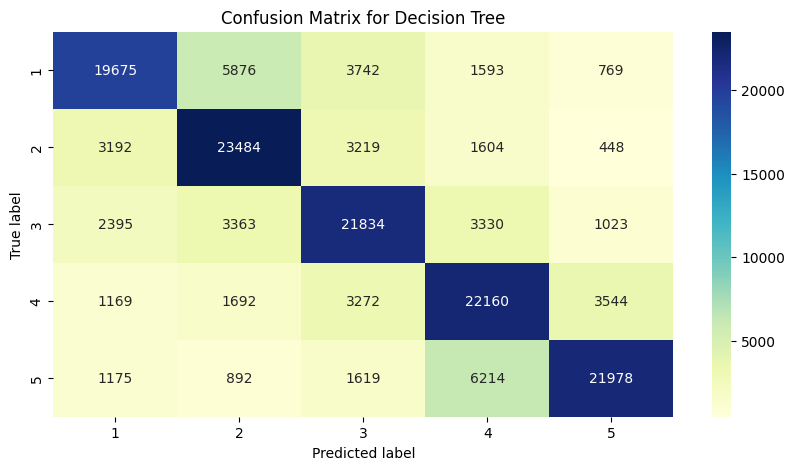

In [35]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Decision Tree')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(verbose=2, solver='liblinear',random_state=42, C=5, penalty='l2',max_iter=1000)
lr=lr.fit(X_train, Y_train)
score = lr.score(X_test, Y_test)

print("Accuracy:", score)

[LibLinear]Accuracy: 0.5699476334593312


In [37]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = lr.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y, digits=4))

Accuracy: 0.5699476334593312

 Clasification report:
               precision    recall  f1-score   support

           1     0.6232    0.6776    0.6493     31655
           2     0.4955    0.4996    0.4976     31947
           3     0.4802    0.4230    0.4498     31945
           4     0.5133    0.5129    0.5131     31837
           5     0.7195    0.7378    0.7285     31878

    accuracy                         0.5699    159262
   macro avg     0.5664    0.5702    0.5677    159262
weighted avg     0.5662    0.5699    0.5675    159262



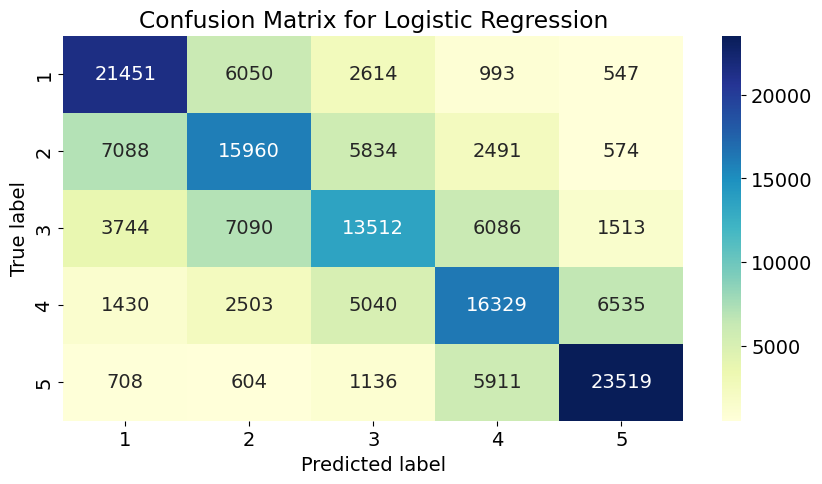

In [38]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Logistic Regression')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
 
rf= RandomForestClassifier( max_depth=60, random_state=42)
rf = rf.fit(X_train, Y_train)
score = rf.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.6906669513129309


In [40]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = rf.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y, digits=4))

Accuracy: 0.6906669513129309

 Clasification report:
               precision    recall  f1-score   support

           1     0.7125    0.7457    0.7287     31655
           2     0.7852    0.6599    0.7171     31947
           3     0.7551    0.6468    0.6968     31945
           4     0.7118    0.5572    0.6251     31837
           5     0.5726    0.8440    0.6823     31878

    accuracy                         0.6907    159262
   macro avg     0.7074    0.6907    0.6900    159262
weighted avg     0.7075    0.6907    0.6900    159262



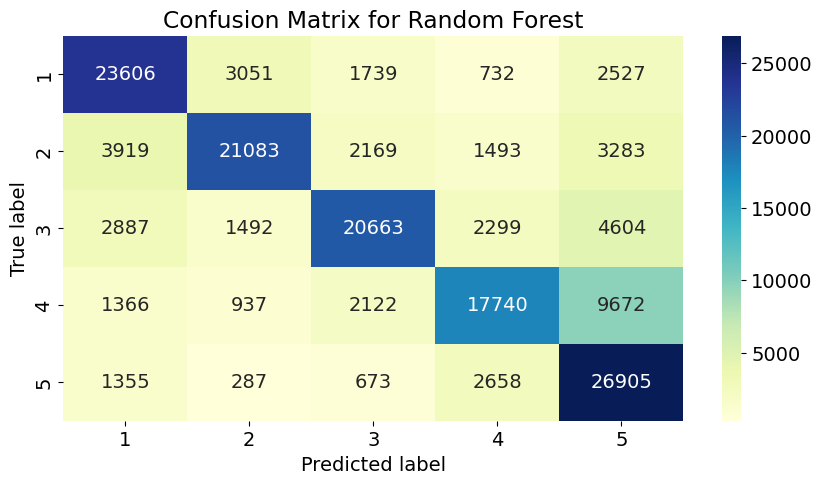

In [41]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Random Forest')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# SVM

In [42]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
svm = LinearSVC()
sv= CalibratedClassifierCV(svm) 
sv = sv.fit(X_train, Y_train)  
score =sv.score(X_test, Y_test)
print("Accuracy:", score)

C:\Users\hkmeh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\hkmeh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\hkmeh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\hkmeh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  war

Accuracy: 0.5687357938491291


In [43]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = sv.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y, digits=4))

Accuracy: 0.5687357938491291

 Clasification report:
               precision    recall  f1-score   support

           1     0.6226    0.6686    0.6447     31655
           2     0.4957    0.5036    0.4996     31947
           3     0.4814    0.4233    0.4505     31945
           4     0.5092    0.5209    0.5150     31837
           5     0.7223    0.7284    0.7253     31878

    accuracy                         0.5687    159262
   macro avg     0.5662    0.5690    0.5670    159262
weighted avg     0.5661    0.5687    0.5668    159262



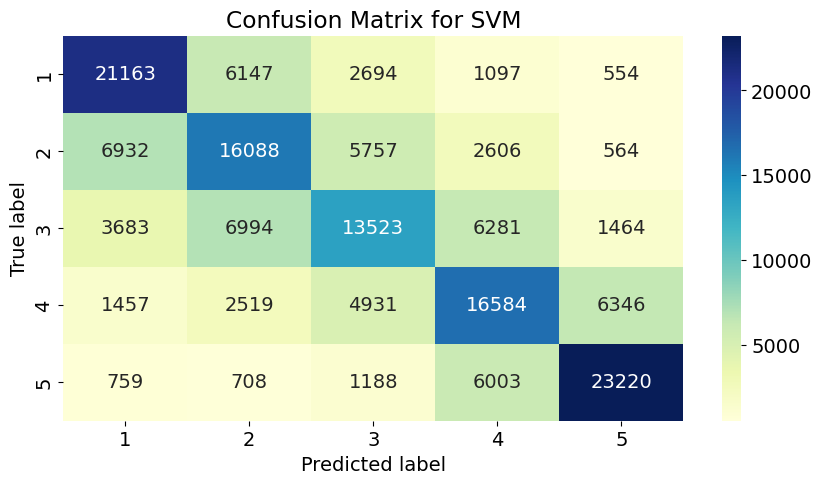

In [44]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for SVM')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# Naive Bayes

In [45]:
from sklearn import model_selection, naive_bayes, svm
nb = naive_bayes.MultinomialNB(alpha=0.1)
nb = nb.fit(X_train, Y_train) 
score = nb.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.5376360964950836


In [46]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = nb.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y, digits=4))

Accuracy: 0.5376360964950836

 Clasification report:
               precision    recall  f1-score   support

           1     0.6045    0.6345    0.6192     31655
           2     0.4568    0.4615    0.4591     31947
           3     0.4493    0.4216    0.4350     31945
           4     0.4745    0.4087    0.4391     31837
           5     0.6688    0.7627    0.7127     31878

    accuracy                         0.5376    159262
   macro avg     0.5308    0.5378    0.5330    159262
weighted avg     0.5306    0.5376    0.5329    159262



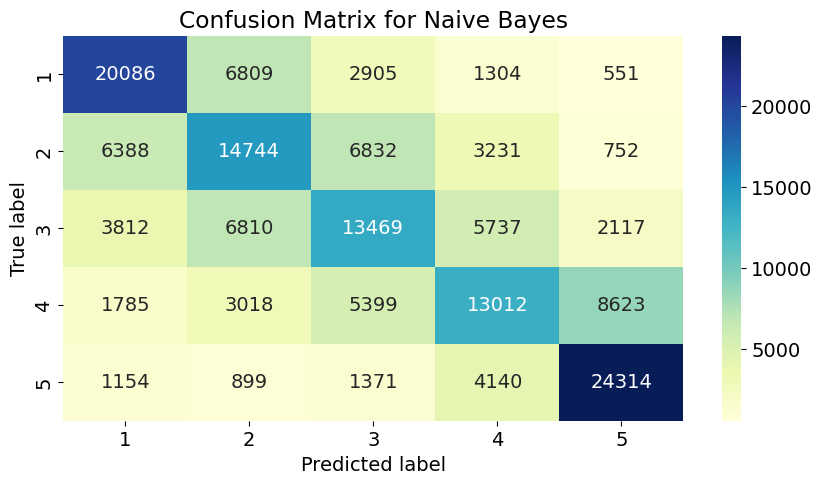

In [47]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Naive Bayes')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# XGBClassifier

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

In [49]:
import xgboost as xgb
model = xgb.XGBClassifier()

#Training the model on the training data
xg=model.fit(X_train, Y_train) 
score = xg.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.5401979128731274


In [50]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = xg.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y, digits=4))

Accuracy: 0.5401979128731274

 Clasification report:
               precision    recall  f1-score   support

           0     0.6155    0.6496    0.6321     31655
           1     0.4073    0.5370    0.4632     31947
           2     0.4851    0.3474    0.4049     31945
           3     0.5041    0.4879    0.4959     31837
           4     0.7217    0.6803    0.7004     31878

    accuracy                         0.5402    159262
   macro avg     0.5467    0.5404    0.5393    159262
weighted avg     0.5466    0.5402    0.5391    159262



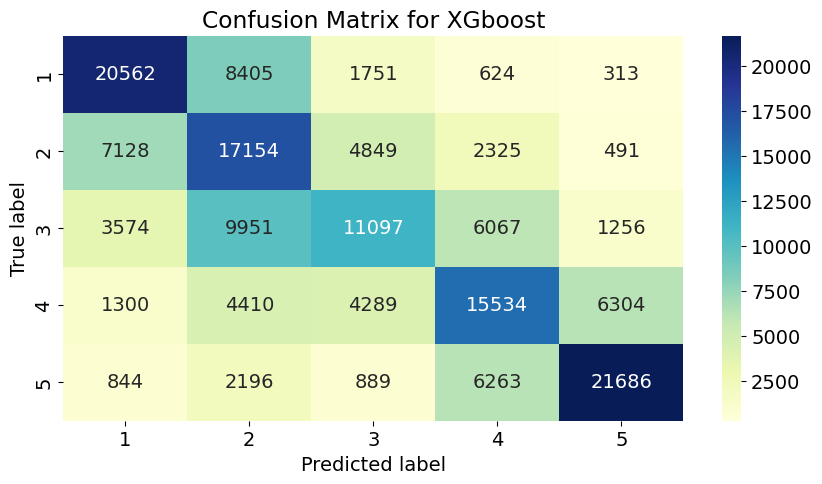

In [51]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for XGboost')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# KNN classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier(n_neighbors=10)
knn=model.fit(X_train, Y_train) 
score = knn.score(X_test, Y_test)

print("Accuracy:", score)

Accuracy: 0.5256181637804372


In [53]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = knn.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y, digits=4))

Accuracy: 0.5256181637804372

 Clasification report:
               precision    recall  f1-score   support

           0     0.6171    0.3068    0.4098     31655
           1     0.3813    0.6866    0.4903     31947
           2     0.5741    0.5359    0.5543     31945
           3     0.5839    0.4937    0.5350     31837
           4     0.6573    0.6032    0.6291     31878

    accuracy                         0.5256    159262
   macro avg     0.5627    0.5252    0.5237    159262
weighted avg     0.5626    0.5256    0.5239    159262



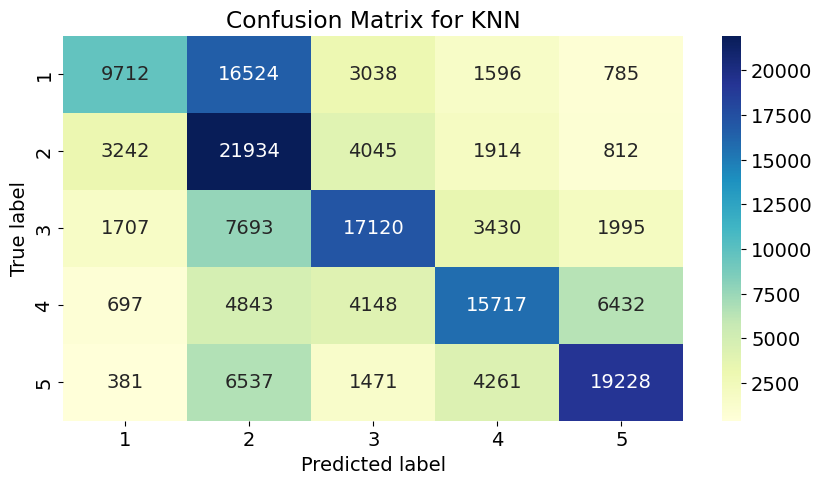

In [54]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for KNN')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()